In [25]:
import pandas as pd

data =pd.read_excel('/Users/mac/Desktop/大二下数据可视化/shein/Emotionalscore.xlsx')
data

,Unnamed: 0,date,length,corpus,stars,helpfulness,Sentiment Score
0,0,2022/4/26 10:16,22,dress super cute comfy cant wait wear dress va...,5,1806,0.8555
1,1,2022/6/4 4:25,8,cute lt3 like pls im broke,5,1150,0.4588
2,2,2022/6/3 10:37,132,oh im obsessed cutest dainty dress thats perfe...,5,734,0.9863
3,3,2022/5/10 18:32,16,love dress fits perfect size medium chest,5,378,0.8360
4,4,2022/4/21 1:21,5,obsessed fit perfect,5,305,0.6705
...,...,...,...,...,...,...,...
2648,79,"19 Aug,2022",16,dont love sleeves tight waist tight chest loose,1,0,-0.6876
2649,80,"13 Aug,2022",22,wanted love dress thin zipper defective ordere...,1,0,0.7269
2650,81,"13 Aug,2022",14,looks like image poor material quality,1,0,-0.1531
2651,82,"10 Aug,2022",15,cheap material thing runs bit small please lik...,1,0,0.2500


In [30]:
positive_corpus = data.loc[data['Sentiment Score'] > 0, 'corpus']
positive_corpus

0       dress super cute comfy cant wait wear dress va...
1                              cute lt3 like pls im broke
2       oh im obsessed cutest dainty dress thats perfe...
3               love dress fits perfect size medium chest
4                                    obsessed fit perfect
                              ...                        
2646    color polyester material shoulder area weird f...
2647    dress fit super big around bust area read revi...
2649    wanted love dress thin zipper defective ordere...
2651    cheap material thing runs bit small please lik...
2652    chest fits weird look took picture cuter dress...
Name: corpus, Length: 2209, dtype: object

In [31]:
negative_corpus = data.loc[data['Sentiment Score'] < 0, 'corpus']
negative_corpus

68                    little house prairie sad high hopes
180     55 140 lbs b cup small fit well teensy bit aro...
226     cure fits well give boobs weird shape tjough l...
304                got large accident supposed small cute
312                                im sorry hate honestly
                              ...                        
2632    dress didnt look like picture usually xl incre...
2637    order least one typical size runs big wouldnt ...
2638                    disappointed didnt fit runs small
2648      dont love sleeves tight waist tight chest loose
2650               looks like image poor material quality
Name: corpus, Length: 187, dtype: object

In [32]:
documents_p = positive_corpus.tolist()
documents_p

['dress super cute comfy cant wait wear dress vacation fits like imagined',
 'cute lt3 like pls im broke',
 'oh im obsessed cutest dainty dress thats perfect summer got option attend graduation perfect modest sweet hot time absolutely cottagecore picnic look im thicker girl 53 150160 lbs slight pear shaped body absolutely incredibly beautiful curvy bodies feel body confident havent felt long huge steal price confidence gave absolutely ladies gorgeous gorgeous piece perfect length breathable flowy linen material total bridgerton vibes dress chest area 34c damn flattering hair ribbon shein',
 'love dress fits perfect size medium chest',
 'obsessed fit perfect',
 'got 30 bday new orleans loved flattering thick thin fit perfectly big hit im 34d fit great boobs new favorite sundress',
 'dress new favorite hugs waist bust adjustable slit side perfect placement helps please like points measurements correct',
 'feel beautiful dress true size little big breast area small boobs ware',
 'frickin 

In [33]:
documents_n = negative_corpus.tolist()
documents_n

['little house prairie sad high hopes',
 '55 140 lbs b cup small fit well teensy bit around chest nothing strapless bra wont care quite beautiful',
 'cure fits well give boobs weird shape tjough lets hang low 34dd 57 155lb',
 'got large accident supposed small cute',
 'im sorry hate honestly',
 'like much regretting buying dress price condition',
 'okay didnt like covered curves',
 'sper cute material lighter side sizing info wrong dont refer size 1 jeans weigh 120 pounds height 50',
 'beautiful dress material isnt favorite great fit im keeping strapless bra fits nicely',
 'elastic around arms bit loose slips doesnt give balloon shoulder sleeve effect',
 'obsessed w dress wear 247 measurements accurate',
 'est sin planchar queda muy bonito creo que small para mi fuera mejor mido 52 peso 127 36c de busto unos likes para mi si te ayude',
 'absolutely obsessed wear dress time especially purple color',
 'dress got wrong size',
 'sent wrong size im waiting review',
 'cute got wrong size',
 

In [37]:
documents = data['corpus'].tolist()
documents

['dress super cute comfy cant wait wear dress vacation fits like imagined',
 'cute lt3 like pls im broke',
 'oh im obsessed cutest dainty dress thats perfect summer got option attend graduation perfect modest sweet hot time absolutely cottagecore picnic look im thicker girl 53 150160 lbs slight pear shaped body absolutely incredibly beautiful curvy bodies feel body confident havent felt long huge steal price confidence gave absolutely ladies gorgeous gorgeous piece perfect length breathable flowy linen material total bridgerton vibes dress chest area 34c damn flattering hair ribbon shein',
 'love dress fits perfect size medium chest',
 'obsessed fit perfect',
 'got 30 bday new orleans loved flattering thick thin fit perfectly big hit im 34d fit great boobs new favorite sundress',
 'dress new favorite hugs waist bust adjustable slit side perfect placement helps please like points measurements correct',
 'feel beautiful dress true size little big breast area small boobs ware',
 'frickin 

In [34]:
import nltk
tokenized_documents_p = [nltk.word_tokenize(doc) for doc in documents_p]
tokenized_documents_n = [nltk.word_tokenize(doc) for doc in documents_n]

In [35]:
# 文本预处理（根据需要进行数据清洗、分词等操作）
from gensim import corpora, models
# 创建词袋表示
dictionary_p = corpora.Dictionary(tokenized_documents_p)
corpus_p = [dictionary_p.doc2bow(doc) for doc in tokenized_documents_p]

# 构建LDA模型
lda_model = models.LdaModel(corpus=corpus_p, id2word=dictionary_p, num_topics=3)

# 打印每个主题的关键词
for topic in lda_model.print_topics():
    print(topic)

(0, '0.047*"dress" + 0.031*"fit" + 0.030*"cute" + 0.027*"love" + 0.025*"material" + 0.017*"super" + 0.013*"little" + 0.012*"thin" + 0.012*"top" + 0.012*"pretty"')
(1, '0.042*"dress" + 0.024*"material" + 0.017*"like" + 0.016*"size" + 0.014*"really" + 0.012*"beautiful" + 0.011*"true" + 0.011*"love" + 0.011*"thin" + 0.010*"cute"')
(2, '0.039*"dress" + 0.031*"cute" + 0.029*"like" + 0.021*"size" + 0.018*"big" + 0.017*"fit" + 0.016*"small" + 0.013*"bust" + 0.011*"medium" + 0.011*"pretty"')


In [36]:
# 文本预处理（根据需要进行数据清洗、分词等操作）
from gensim import corpora, models
# 创建词袋表示
dictionary_n = corpora.Dictionary(tokenized_documents_n)
corpus_n = [dictionary_n.doc2bow(doc) for doc in tokenized_documents_n]

# 构建LDA模型
lda_model = models.LdaModel(corpus=corpus_n, id2word=dictionary_n, num_topics=3)

# 打印每个主题的关键词
for topic in lda_model.print_topics():
    print(topic)

(0, '0.021*"cute" + 0.018*"material" + 0.018*"zipper" + 0.013*"little" + 0.013*"fit" + 0.012*"dress" + 0.012*"like" + 0.011*"cheap" + 0.011*"thin" + 0.011*"look"')
(1, '0.040*"dress" + 0.019*"loose" + 0.017*"fit" + 0.015*"size" + 0.015*"like" + 0.015*"cute" + 0.014*"chest" + 0.014*"didnt" + 0.010*"weird" + 0.010*"fits"')
(2, '0.033*"dress" + 0.026*"like" + 0.023*"small" + 0.020*"size" + 0.019*"looks" + 0.014*"material" + 0.014*"fit" + 0.012*"really" + 0.011*"dont" + 0.011*"disappointed"')


In [28]:
# 文本预处理（根据需要进行数据清洗、分词等操作）
from gensim import corpora, models
# 创建词袋表示
dictionary_p = corpora.Dictionary(tokenized_documents_p)
corpus_p = [dictionary_p.doc2bow(doc) for doc in tokenized_documents_p]

# 构建LDA模型
lda_model = models.LdaModel(corpus=corpus_p, id2word=dictionary, num_topics=3)

# 打印每个主题的关键词
for topic in lda_model.print_topics():
    print(topic)


(0, '0.034*"dress" + 0.018*"size" + 0.014*"fit" + 0.012*"material" + 0.011*"love" + 0.011*"pretty" + 0.011*"thin" + 0.011*"cute" + 0.010*"fabric" + 0.009*"fits"')
(1, '0.039*"cute" + 0.029*"material" + 0.026*"dress" + 0.023*"size" + 0.021*"fit" + 0.019*"big" + 0.019*"love" + 0.016*"small" + 0.013*"bust" + 0.013*"super"')
(2, '0.062*"dress" + 0.031*"like" + 0.028*"cute" + 0.017*"fit" + 0.017*"small" + 0.015*"little" + 0.012*"really" + 0.011*"picture" + 0.011*"pretty" + 0.011*"love"')


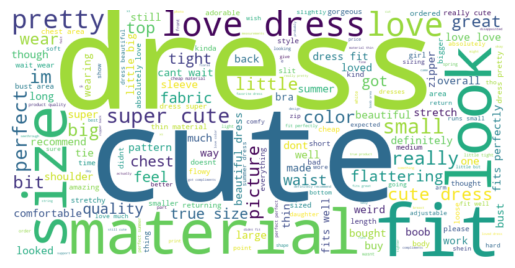

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tokenized_documents = [nltk.word_tokenize(doc) for doc in documents]
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]
# 将每个子列表转换为字符串
corpus_str = [' '.join(doc) for doc in tokenized_documents]

# 将文本列表转换为字符串
text = ' '.join(corpus_str)

# 创建词云对象并生成词云图像
wordcloud = WordCloud(width=800, height=400,background_color='white', colormap='viridis').generate(text)

# 绘制词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
